In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from futsim_funcs import TPR,TFR,TPSR

In [2]:
import warnings
warnings.filterwarnings("ignore", message="The default value of numeric_only in DataFrame.mean is deprecated.", category=FutureWarning)

<br>

# Matchday Goal Count

In [3]:
data_eng = {
    'Goals': [2, 3, 1, 4, 5, 0, 6, 7, 8, 9],
    'Percentage': [22.9, 20.8, 18.4, 15.0, 8.2, 6.1, 4.7, 2.6, 0.8, 0.5],
    'Count': [87, 79, 70, 57, 31, 23, 18, 10, 3, 2],
    'League': ['eng'] * 10  # All rows have the same league 'eng'
}

df_eng = pd.DataFrame(data_eng)

In [4]:
data_ita = {
    'Goals': [2, 3, 1, 4, 5, 0, 6, 7],
    'Percentage': [24.9, 22.5, 18.7, 14.5, 7.3, 7.3, 3.5, 1.4],
    'Count': [72, 65, 54, 42, 21, 21, 10, 4],
    'League': ['ita'] * 8  # All rows have the same league 'ita'
}

df_ita = pd.DataFrame(data_ita)

In [5]:
data_esp = {
    'Goals': [2, 1, 3, 4, 0, 5, 6, 7, 8],
    'Percentage': [26.3, 19.7, 18.3, 11.1, 8.7, 7.6, 4.8, 2.4, 1.0],
    'Count': [76, 57, 53, 32, 25, 22, 14, 7, 3],
    'League': ['esp'] * 9  # All rows have the same league 'esp'
}

df_esp = pd.DataFrame(data_esp)

In [6]:
data_ger = {
    'Goals': [2, 3, 4, 1, 5, 6, 0, 7, 8, 9],
    'Percentage': [22.6, 21.4, 20.5, 11.1, 9.4, 7.7, 3.8, 2.1, 0.9, 0.4],
    'Count': [53, 50, 48, 26, 22, 18, 9, 5, 2, 1],
    'League': ['ger'] * 10  # All rows have the same league 'ger'
}

df_ger = pd.DataFrame(data_ger)

In [7]:
data_fra = {
    'Goals': [3, 2, 4, 1, 0, 5, 6, 8, 7],
    'Percentage': [23.5, 23.1, 16.2, 16.2, 10.3, 6.4, 3.0, 0.9, 0.4],
    'Count': [55, 54, 38, 38, 24, 15, 7, 2, 1],
    'League': ['fra'] * 9  # All rows have the same league 'fra'
}

df_fra = pd.DataFrame(data_fra)

In [8]:
# List of DataFrames for each league
dfs = [df_eng, df_ita, df_esp, df_ger, df_fra]

# Concatenate DataFrames
df_merged = pd.concat(dfs)
df_merged.drop(columns=["Percentage"], inplace=True)

# Group by 'Goals' and sum up the 'Count' for each goal
df_merged = df_merged.groupby('Goals').agg({'Count': 'sum'}).reset_index()
total_count = df_merged['Count'].sum()

In [9]:
df_merged['Percentage'] = df_merged['Count'] / total_count * 100

In [10]:
goals_per_match = df_merged.copy()

In [11]:
goals_per_match

,Goals,Count,Percentage
0,0,102,7.152875
1,1,245,17.180926
2,2,342,23.983170
3,3,302,21.178121
4,4,217,15.217391
5,5,111,7.784011
6,6,67,4.698457
7,7,27,1.893408
8,8,10,0.701262
9,9,3,0.210379


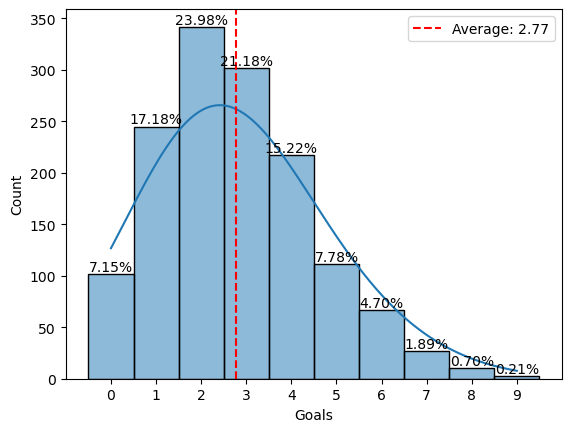

In [12]:
# Plot the histogram
ax = sns.histplot(data=goals_per_match, x="Goals", weights="Count", kde=True, bins=range(11), discrete=True)

# Calculate the average
average_goals = (goals_per_match["Goals"] * goals_per_match["Count"]).sum() / goals_per_match["Count"].sum()

# Add average line
ax.axvline(average_goals, color='red', linestyle='--', label=f'Average: {average_goals:.2f}')
ax.legend()

# Add percentage values on bars
total_count = goals_per_match["Count"].sum()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{(height / total_count * 100):.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

# Set x-axis ticks from 0 to 9
plt.xticks(range(10))
plt.show()

In [13]:
goals_count = goals_per_match['Goals'].tolist()
goals_count_probabilities = goals_per_match['Percentage'].div(100).tolist()  # Convert percentage to probability

def MGC(goals_count, goals_count_probabilities):
    '''
    Matchday Goal Count
    '''
    random_goal = np.random.choice(goals_count, p=goals_count_probabilities)
    return random_goal

for i in range(1):
    random_goal = MGC(goals_count, goals_count_probabilities)
    print("-----",random_goal,"-----")

----- 2 -----


<br>

# Matchday Actions Count

<h1 style="color:Blue">Shot</h3>

In [14]:
import pandas as pd

data = {
    'Competition Name': ['de Bundesliga', 'es La Liga', 'fr Ligue 1', 'eng Premier League', 'it Serie A'],
    'Gls': [1.55, 1.22, 1.35, 1.37, 1.24],
    'Sh': [12.58, 12.17, 12.06, 12.51, 12.56],
    'SoT': [4.42, 3.98, 4.26, 4.15, 3.92],
    'SoT%': [35.1, 32.7, 35.3, 33.2, 31.2],
    'G/Sh': [0.11, 0.09, 0.10, 0.10, 0.09],
    'G/SoT': [0.32, 0.28, 0.28, 0.31, 0.29],
    'Dist': [17.4, 17.9, 17.4, 16.9, 17.9],
    'FK': [0.41, 0.43, 0.41, 0.40, 0.45],
    'PK': [0.14, 0.11, 0.15, 0.10, 0.11],
    'PKatt': [0.18, 0.15, 0.19, 0.13, 0.14],
    'xG': [1.45, 1.30, 1.41, 1.42, 1.26],
    'npxG': [1.31, 1.18, 1.27, 1.32, 1.15],
    'npxG/Sh': [0.11, 0.10, 0.11, 0.11, 0.09],
    'G-xG': ['+0.07', '-0.11', '-0.09', '-0.09', '-0.05'],
    'np:G-xG': ['+0.07', '-0.10', '-0.09', '-0.08', '-0.05']
}

df_shooting = pd.DataFrame(data)
df_shooting

,Competition Name,Gls,Sh,SoT,SoT%,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,de Bundesliga,1.55,12.58,4.42,35.1,0.11,0.32,17.4,0.41,0.14,0.18,1.45,1.31,0.11,+0.07,+0.07
1,es La Liga,1.22,12.17,3.98,32.7,0.09,0.28,17.9,0.43,0.11,0.15,1.30,1.18,0.10,-0.11,-0.10
2,fr Ligue 1,1.35,12.06,4.26,35.3,0.10,0.28,17.4,0.41,0.15,0.19,1.41,1.27,0.11,-0.09,-0.09
3,eng Premier League,1.37,12.51,4.15,33.2,0.10,0.31,16.9,0.40,0.10,0.13,1.42,1.32,0.11,-0.09,-0.08
4,it Serie A,1.24,12.56,3.92,31.2,0.09,0.29,17.9,0.45,0.11,0.14,1.26,1.15,0.09,-0.05,-0.05


In [15]:
x = df_shooting
shots_per_match = np.mean(x["Sh"])
sot_percentage = np.sum(x["SoT"]) / np.sum(x["Sh"])
goal_percentage = np.sum(x["Gls"]) / np.sum(x["SoT"])

In [16]:
column_width = 12
print(f"{'Sh/Match':<{column_width}} {'SoT/Sh':<{column_width}} {'Gls/SoT':<{column_width}}")
print(f"{shots_per_match:<{column_width}.2f} {sot_percentage:<{column_width}.2f} {goal_percentage:<{column_width}.2f}")

Sh/Match     SoT/Sh       Gls/SoT     
12.38        0.34         0.32        


In [17]:
def transform_rating(rating, average_rating=70, advantage=1, disadvantage=-1.5):
    # Calculate the difference between the rating and the average
    diff = rating - average_rating
    
    # Apply advantage and disadvantage based on the difference
    if diff > 0:
        # Apply advantage for ratings higher than average
        transformed_rating = average_rating + diff * (1 + advantage)
    else:
        # Apply disadvantage for ratings lower than average
        transformed_rating = average_rating + diff * (1 - disadvantage)
    
    # Scale the transformed rating to a range between 0 and 1
    scaled_rating = (transformed_rating - 60) / (80 - 60)
    
    # Ensure the result is between 0 and 1
    return min(scaled_rating, 1) / 20

# Test the function with ratings 80 and 60
rating_80 = transform_rating(80)
rating_60 = transform_rating(60)

print("Transformed rating for 80:", rating_80)
print("Transformed rating for 60:", rating_60)

Transformed rating for 80: 0.05
Transformed rating for 60: -0.0375


In [18]:
finishing = 80

target_p = 0.33 + transform_rating(finishing)
goal_p = 0.30 + transform_rating(finishing)

In [19]:
sot_count_trials=[]
goal_count_trials=[]
shot_count = 13 
for i in range(shot_count):
    goal_counter=0
    sot_counter=0
    shot_on_target = np.random.choice([1, 0], p=[target_p, 1-target_p])
    #print("-----",shot_on_target,"-----")
    if shot_on_target:
        #print("@Shot on Target")
        goal_attempt = np.random.choice([1, 0], p=[goal_p, 1-goal_p])
        sot_counter+=1
        if goal_attempt:
            #print("⚽⚽⚽GOOOOOOOOOOOOOOOOOOOOOOOOOOOL")
            goal_counter+=1
    sot_count_trials.append(sot_counter)
    goal_count_trials.append(goal_counter)    
    
print(shot_count, "Shots")
print(sum(sot_count_trials), "Shot on Target")
print(sum(goal_count_trials), "Goals")

ratio = sum(goal_count_trials) / sum(sot_count_trials)
goal_per_sot = ratio if ratio==0 or shot_count else 0
print("G/SoT:", goal_per_sot )

13 Shots
5 Shot on Target
2 Goals
G/SoT: 0.4


In [20]:
sum(goals_per_match.Goals * goals_per_match.Count)

3956

In [21]:
players_df = pd.read_csv("../fifa24_db/pdb_23.csv")
TFR(players_df, 18).sort_values("power", ascending=False).head()

,league_id,club_team_id,league_name,club_name,power,finishing
84,13,10,Premier League,Manchester City,85,82
109,53,243,La Liga,Real Madrid,84,80
81,13,9,Premier League,Liverpool,84,79
101,16,73,Ligue 1,Paris Saint Germain,84,75
70,31,44,Serie A,Inter,83,78


In [22]:
q = players_df["club_name"].str.contains("chelsea", case=False)
players_df[q].sort_values(by="overall", ascending=False).head(n=3)

,player_id,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,dob,height_cm,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
19,215914,N. Kanté,N'Golo Kanté,CDM,89,89,72000000.0,220000.0,1991-03-29,168,...,86,86,86,84,84,84,84,84,84,20
41,201024,K. Koulibaly,Kalidou Koulibaly,CB,87,87,54500000.0,175000.0,1991-06-20,187,...,79,79,79,75,78,86,86,86,78,17
51,234642,É. Mendy,Édouard Mendy,GK,86,87,51000000.0,130000.0,1992-03-01,197,...,34,34,34,28,26,26,26,26,26,84


<br>

<br>

# FIFA & FBREF REGRESSION📈 

### Importing Data

In [23]:
url = "https://fbref.com/en/comps/Big5/2022-2023/shooting/squads/2022-2023-Big-5-European-Leagues-Stats"
fbref_data = pd.read_html( url, header=1)[0]

fifa_data = TFR(players_df)
fifa_data["league_id"] = fifa_data["league_id"].astype(str)
top5_leagues_id = [str(i) for i in [13,53,19,31,16]]
q = fifa_data["league_id"].str.contains('|'.join(top5_leagues_id))

fifa_data = fifa_data[q]

### Merging FIFA & FBRef

In [24]:
from rapidfuzz import process
def find_best_match(name, choices):
    return process.extractOne(name, choices)

def mapped_data(fifa_data, fbref_data):
    fbref_to_fifa_mapping = {fb_name: find_best_match(fb_name, fifa_data['club_name'])[0] for fb_name in fbref_data['Squad']}
    fbref_to_fifa_mapping = {key: value for key, value in fbref_to_fifa_mapping.items() if value is not None}
    fbref_data['Mapped_club_name'] = fbref_data['Squad'].map(fbref_to_fifa_mapping)
    merged_data = pd.merge(fbref_data, fifa_data, how='inner', left_on='Mapped_club_name', right_on='club_name')
    return merged_data

all_team_ids = []
lst = mapped_data(fifa_data, fbref_data)[["Squad","club_name","club_team_id"]]
# print(len(merged_ids))
# for i in zip(lst.Squad, lst.club_name, lst.club_team_id):
#     print(i)

In [24]:
from rapidfuzz import process
def find_best_match(name, choices):
    return process.extractOne(name, choices)

def mapped_data(fifa_data, fbref_data):
    fbref_to_fifa_mapping = {fb_name: find_best_match(fb_name, fifa_data['club_name'])[0] for fb_name in fbref_data['Squad']}
    fbref_to_fifa_mapping = {key: value for key, value in fbref_to_fifa_mapping.items() if value is not None}
    fbref_data['Mapped_club_name'] = fbref_data['Squad'].map(fbref_to_fifa_mapping)
    merged_data = pd.merge(fbref_data, fifa_data, how='inner', left_on='Mapped_club_name', right_on='club_name')
    return merged_data

all_team_ids = []
lst = mapped_data(fifa_data, fbref_data)[["Squad","club_name","club_team_id"]]
# print(len(merged_ids))
# for i in zip(lst.Squad, lst.club_name, lst.club_team_id):
#     print(i)

In [25]:
data = mapped_data(fifa_data, fbref_data).copy()
data.columns

Index(['Rk', 'Squad', 'Comp', '# Pl', '90s', 'Gls', 'Sh', 'SoT', 'SoT%',
       'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK', 'PK', 'PKatt', 'xG',
       'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG', 'Mapped_club_name', 'league_id',
       'club_team_id', 'league_name', 'club_name', 'power', 'finishing'],
      dtype='object')

### Linear Model

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

feature_columns = ["finishing","power"]
target_variable = "G/SoT"

X = data[feature_columns]
y = data[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 0.0020876822456911293
Coefficients: [-0.00201074  0.00714014]
Intercept: -0.11045683825619212


### Error

In [27]:
predicted_g_sot_all = model.predict(X)
data['Predicted'] = predicted_g_sot_all
data["Error"] = data['G/SoT'] - predicted_g_sot_all
data["Error"].mean()

0.001537846246250891

### Test

In [28]:
finishing = 82
power = 84

input_data = pd.DataFrame({
    "finishing": [finishing],
    "power": [power]
})

predicted_g_sot = model.predict(input_data)
predicted_g_sot

array([0.32443407])

In [29]:
data[["club_team_id","Squad","G/SoT","Predicted","power"]].sort_values("Predicted",ascending=False).head(n=5)

,club_team_id,Squad,G/SoT,Predicted,power
68,73,Paris S-G,0.33,0.338509,84
21,5,Chelsea,0.23,0.335391,83
10,241,Barcelona,0.37,0.333380,83
55,10,Manchester City,0.40,0.331574,85
49,9,Liverpool,0.34,0.330466,84


In [30]:
home=data[data.club_team_id==10]
away=data[data.club_team_id==10029]

In [31]:
home.columns

Index(['Rk', 'Squad', 'Comp', '# Pl', '90s', 'Gls', 'Sh', 'SoT', 'SoT%',
       'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK', 'PK', 'PKatt', 'xG',
       'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG', 'Mapped_club_name', 'league_id',
       'club_team_id', 'league_name', 'club_name', 'power', 'finishing',
       'Predicted', 'Error'],
      dtype='object')

In [32]:
sog1 = home["Predicted"].iloc[0]
pow1 = home["power"].iloc[0]

sog2 = away["Predicted"].iloc[0]
pow2 = away["power"].iloc[0]

<br>

<h1 style="color:Blue">Pass</h3>

In [39]:
TPSR(players_df)

,league_id,club_team_id,league_name,club_name,power,passing
101,16,73,Ligue 1,Paris Saint Germain,84,80
84,13,10,Premier League,Manchester City,85,80
109,53,243,La Liga,Real Madrid,84,80
81,13,9,Premier League,Liverpool,84,79
30,13,5,Premier League,Chelsea,83,79
...,...,...,...,...,...,...
29,308,518,Liga Portugal,Chaves,67,60
64,68,112120,Super Lig,Giresunspor,66,59
41,10,1971,Eredivisie,Excelsior,65,59
51,10,645,Eredivisie,FC Volendam,64,57


# Next Goal Probability

In [37]:
import numpy as np

def NGP(home_rating, away_rating):
    min_rating = 70
    max_rating = 84 # DENEMELER 78, 80
    # Min-Max Normalization
    normalized_home_rating = (home_rating - min_rating) / (max_rating - min_rating)
    normalized_away_rating = (away_rating - min_rating) / (max_rating - min_rating)
    rating_diff = normalized_home_rating - normalized_away_rating
    ngp_prob = 1 / (1 + np.exp(-rating_diff))
    return ngp_prob

#Test
home_rating = 81
away_rating = 71
probability = NGP(home_rating, away_rating)
print("Win probability:", probability)

Win probability: 0.6713474534827301
